In [1]:
import os, xlrd, datetime, csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('default')
spreadsheets = os.listdir('data')

In [2]:
def init():
    ricezioni = csv.writer(open('ricezioni.csv', 'w'))
    attacchi = csv.writer(open('attacchi.csv', 'w'))
    battute = csv.writer(open('battute.csv', 'w'))
    doppie = csv.writer(open('doppie.csv', 'w'))
    muri = csv.writer(open('muri.csv', 'w'))
    players = csv.writer(open('atleti.csv','w'))
    ricezioni.writerow(['R#','R+','R!','R-','R/','R=','nome','campionato','giorno'])
    attacchi.writerow(['A#','A+','A!','A-','A/','A=','nome','campionato','giorno'])
    battute.writerow(['B#','B+','B-','B/','B=','nome','campionato','giorno'])
    doppie.writerow(['P=','nome','campionato','giorno'])
    muri.writerow(['M#','M=','nome','campionato','giorno'])
    players.writerow(['nome','giorno'])
    for i in range(0,len(spreadsheets)):
        filename = os.path.join('data',spreadsheets[i])
        book = xlrd.open_workbook(filename)
        atleti = book.sheet_by_name('Atleti').col_values(2, start_rowx=2)
        numeri_atleti = book.sheet_by_name('Atleti').col_values(0, start_rowx=2)
        evento_sheet = book.sheet_by_name('Evento')
        evento_nomi = evento_sheet.col_values(0)
        evento_valori = evento_sheet.col_values(1)
        campionato = None
        edelta = 0
        if ('campionato:' in evento_nomi):
            campionato = evento_valori[evento_nomi.index('campionato:')]
        datagiorno = evento_valori[evento_nomi.index('data:')]
        format = "%d/%m/%Y"
        giorno_as_datetime = datetime.datetime(*xlrd.xldate_as_tuple(datagiorno, book.datemode))
        giorno = giorno_as_datetime.date().strftime(format)
        for atleta in atleti:
            numero = str(numeri_atleti[atleti.index(atleta)]).replace(".0","")
            nome_sheet = "Gioc " + numero
            tail = [atleta,campionato,giorno]
            try:
                dati = book.sheet_by_name(nome_sheet)
                rsymbol = dati.cell_value(rowx=4, colx=3)
                rdelta = 0
                if rsymbol == "R!":
                    rdelta = 1
                ricezione = dati.row_values(rowx=5, start_colx=1, end_colx=6+rdelta)
                if rdelta == 0:
                    nricezione = ricezione[:2]
                    nricezione.append(0.0)
                    nricezione = nricezione + ricezione[2:]
                    ricezione = nricezione
                if sum(ricezione) > 0:
                    players.writerow([atleta,giorno])
                ricezione += tail
                ricezioni.writerow(ricezione)
                muro = dati.row_values(rowx=5, start_colx=8, end_colx=10)
                if sum(muro) > 0:
                    players.writerow([atleta,giorno])
                muro += tail
                muri.writerow(muro)
                doppia = dati.row_values(rowx=7, start_colx=9, end_colx=10)
                if sum(doppia) > 0:
                    players.writerow([atleta,giorno])
                doppia += tail
                doppie.writerow(doppia)
                battuta = dati.row_values(rowx=12, start_colx=1, end_colx=6)
                if sum(battuta) > 0:
                    players.writerow([atleta,giorno])
                battuta += tail
                battute.writerow(battuta)
                attacco = dati.row_values(rowx=19, start_colx=1, end_colx=7)
                if sum(attacco) > 0:
                    players.writerow([atleta,giorno])
                attacco += tail
                attacchi.writerow(attacco)
            except xlrd.biffh.XLRDError as error:
                pass

# avvio

In [3]:
init()

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Giocatori

In [4]:
players = pd.read_csv('atleti.csv')
totale_partite_giocate_atleta=players.drop_duplicates().groupby('nome').size()

In [5]:
totale_partite_giocate_atleta = totale_partite_giocate_atleta.to_frame()

In [6]:
totale_partite_giocate_atleta.rename(columns={0: 'partite giocate'}, inplace=True)

In [7]:
totale_partite_giocate_atleta = totale_partite_giocate_atleta.sort_values('partite giocate')

In [8]:
totale_partite_giocate_atleta.sort_values('partite giocate',ascending=False)

,partite giocate
nome,
Elisa Della Valentina,29
Francesca Peretti,28
Alessia Ruele,27
Anna Gardumi,27
Martina Consolati,26
Serena Olocco,26
Licia Fondriest,24
Martina Rizzi,20
Stefania Della Valentina,18


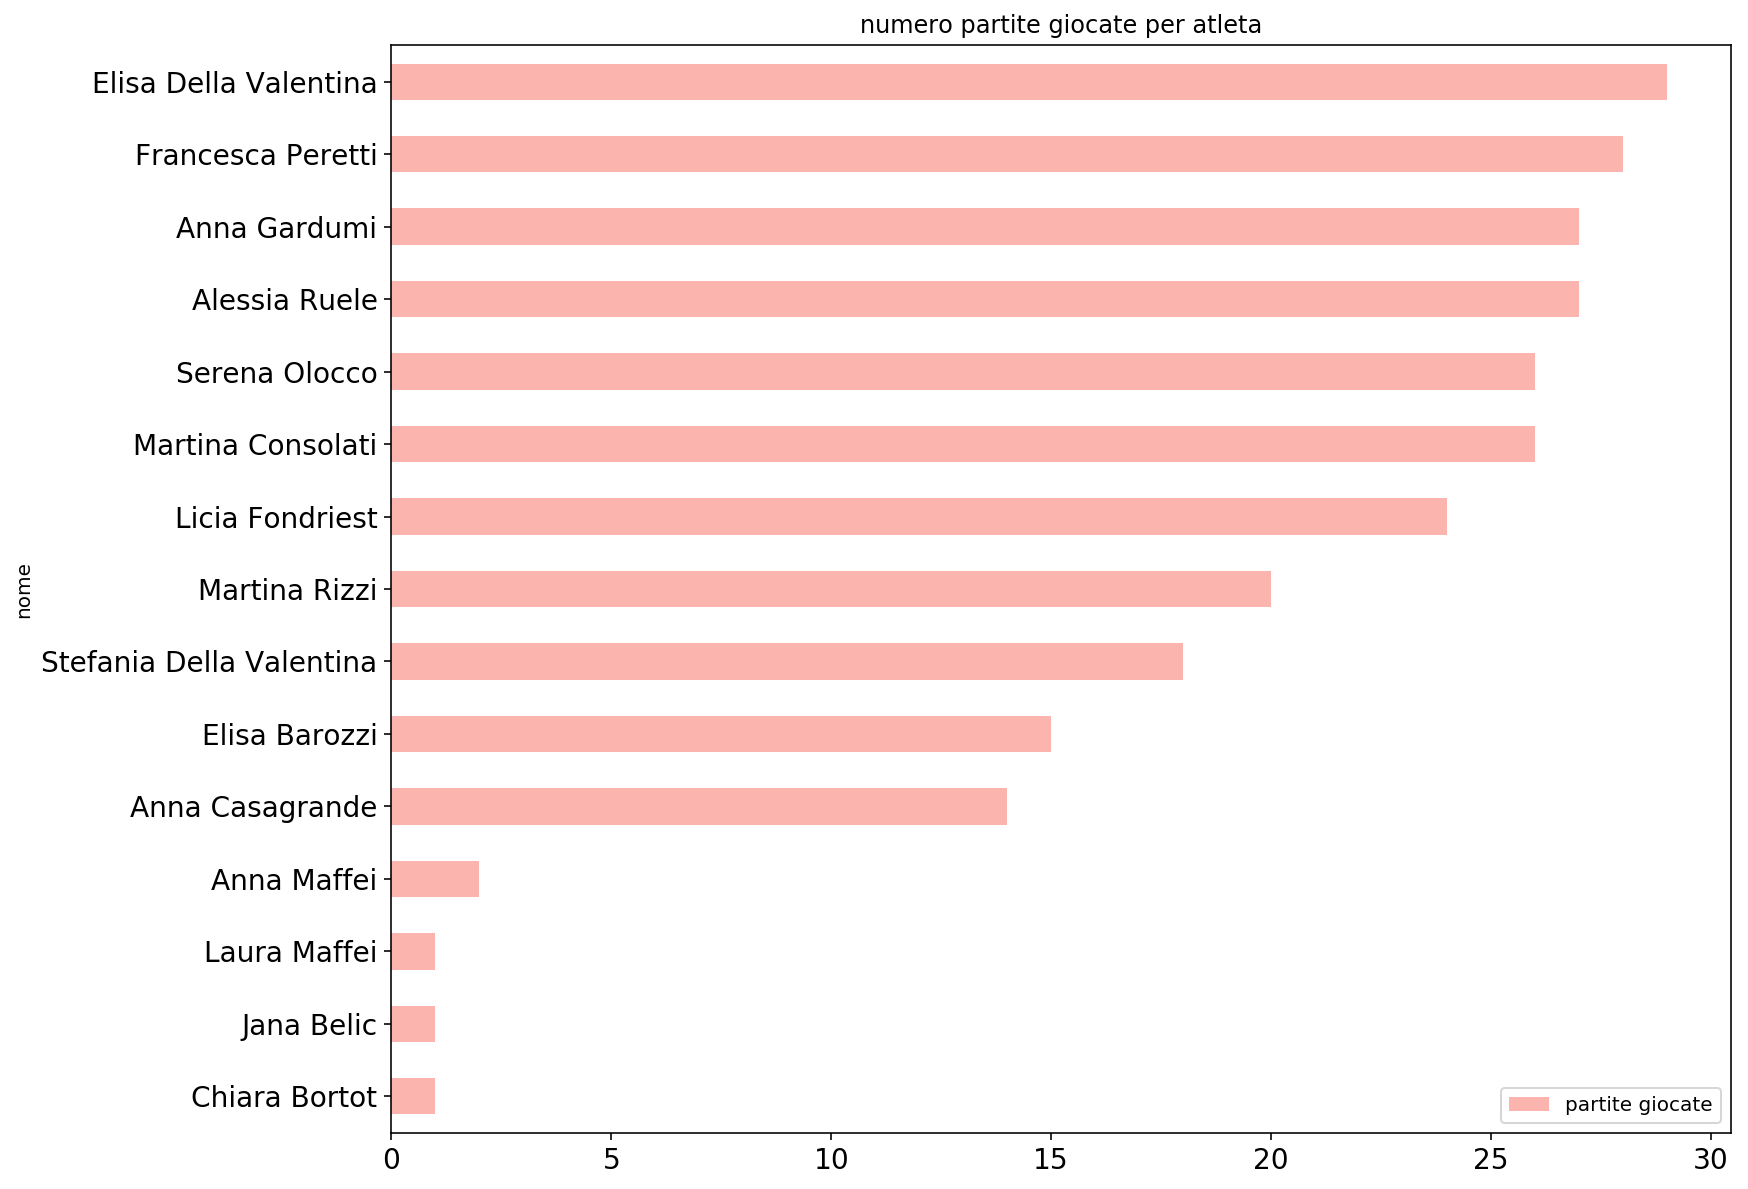

In [9]:
grafico_partite_giocate = totale_partite_giocate_atleta.plot.barh(
    title="numero partite giocate per atleta",
    fontsize=14,
    colormap='Pastel1',
    linestyle='--',
    linewidth=1.2,
    figsize=(12,10)
);

In [10]:
totale_partite_giocate_atleta=totale_partite_giocate_atleta.reset_index()

# Ricezione

In [11]:
ricezioni = pd.read_csv('ricezioni.csv')

In [12]:
ricezione_totali_atlete = ricezioni[["R#","R+","R-","R/","R=","nome"]].pivot_table(index='nome',aggfunc='sum').sort_values(['R#','R+'],ascending=False).head(11)

In [13]:
ricezione_totali_atlete = ricezione_totali_atlete.astype(int)

In [14]:
ricezione_totali_atlete['totale'] = ricezione_totali_atlete['R#'] + ricezione_totali_atlete['R+'] + ricezione_totali_atlete['R-'] + ricezione_totali_atlete['R/'] + ricezione_totali_atlete['R=']

In [15]:
ricezione_totali_atlete['positivita'] = round(((ricezione_totali_atlete['R#'] + ricezione_totali_atlete['R+'])/ricezione_totali_atlete['totale']*100),2)

In [16]:
ricezione_totali_atlete['efficacia'] = round(((ricezione_totali_atlete['R#'] + ricezione_totali_atlete["R+"] - ricezione_totali_atlete['R='] - ricezione_totali_atlete['R/'])/ricezione_totali_atlete['totale']*100),2)

In [17]:
ricezione_totali_atlete['efficienza'] = round(((ricezione_totali_atlete['R#'] - ricezione_totali_atlete['R='] )/ricezione_totali_atlete['totale']*100),2)

In [18]:
ricezione_totali_atlete= ricezione_totali_atlete.reset_index()

In [19]:
ricezione_totali_atlete = ricezione_totali_atlete.merge(totale_partite_giocate_atleta, left_on='nome', right_on='nome')

In [20]:
ricezione_totali_atlete['media ace subiti per partita'] = round(ricezione_totali_atlete["R="] / ricezione_totali_atlete["partite giocate"],2)

In [21]:
ricezione_totali_atlete=ricezione_totali_atlete.sort_values('efficienza',ascending=False)

In [22]:
ricezione_totali_atlete.fillna("-")

,nome,R#,R+,R-,R/,R=,totale,positivita,efficacia,efficienza,partite giocate,media ace subiti per partita
0,Elisa Della Valentina,186,228,88,17,53,572,72.38,60.14,23.25,29,1.83
1,Francesca Peretti,93,232,108,18,58,509,63.85,48.92,6.88,28,2.07
2,Anna Casagrande,42,93,34,6,30,205,65.85,48.29,5.85,14,2.14
4,Serena Olocco,7,31,16,1,5,60,63.33,53.33,3.33,26,0.19
6,Stefania Della Valentina,1,2,0,1,1,5,60.00,20.00,0.00,18,0.06
3,Martina Consolati,37,132,53,3,40,265,63.77,47.55,-1.13,26,1.54
5,Alessia Ruele,1,5,2,0,2,10,60.00,40.00,-10.00,27,0.07
8,Licia Fondriest,0,4,0,0,1,5,80.00,60.00,-20.00,24,0.04
7,Martina Rizzi,0,6,3,2,4,15,40.00,0.00,-26.67,20,0.20
9,Anna Gardumi,0,1,0,0,2,3,33.33,-33.33,-66.67,27,0.07


In [23]:
ricezione_totali_ricevitori=ricezione_totali_atlete.sort_values("totale",ascending=False).head(6).sort_values("efficacia")

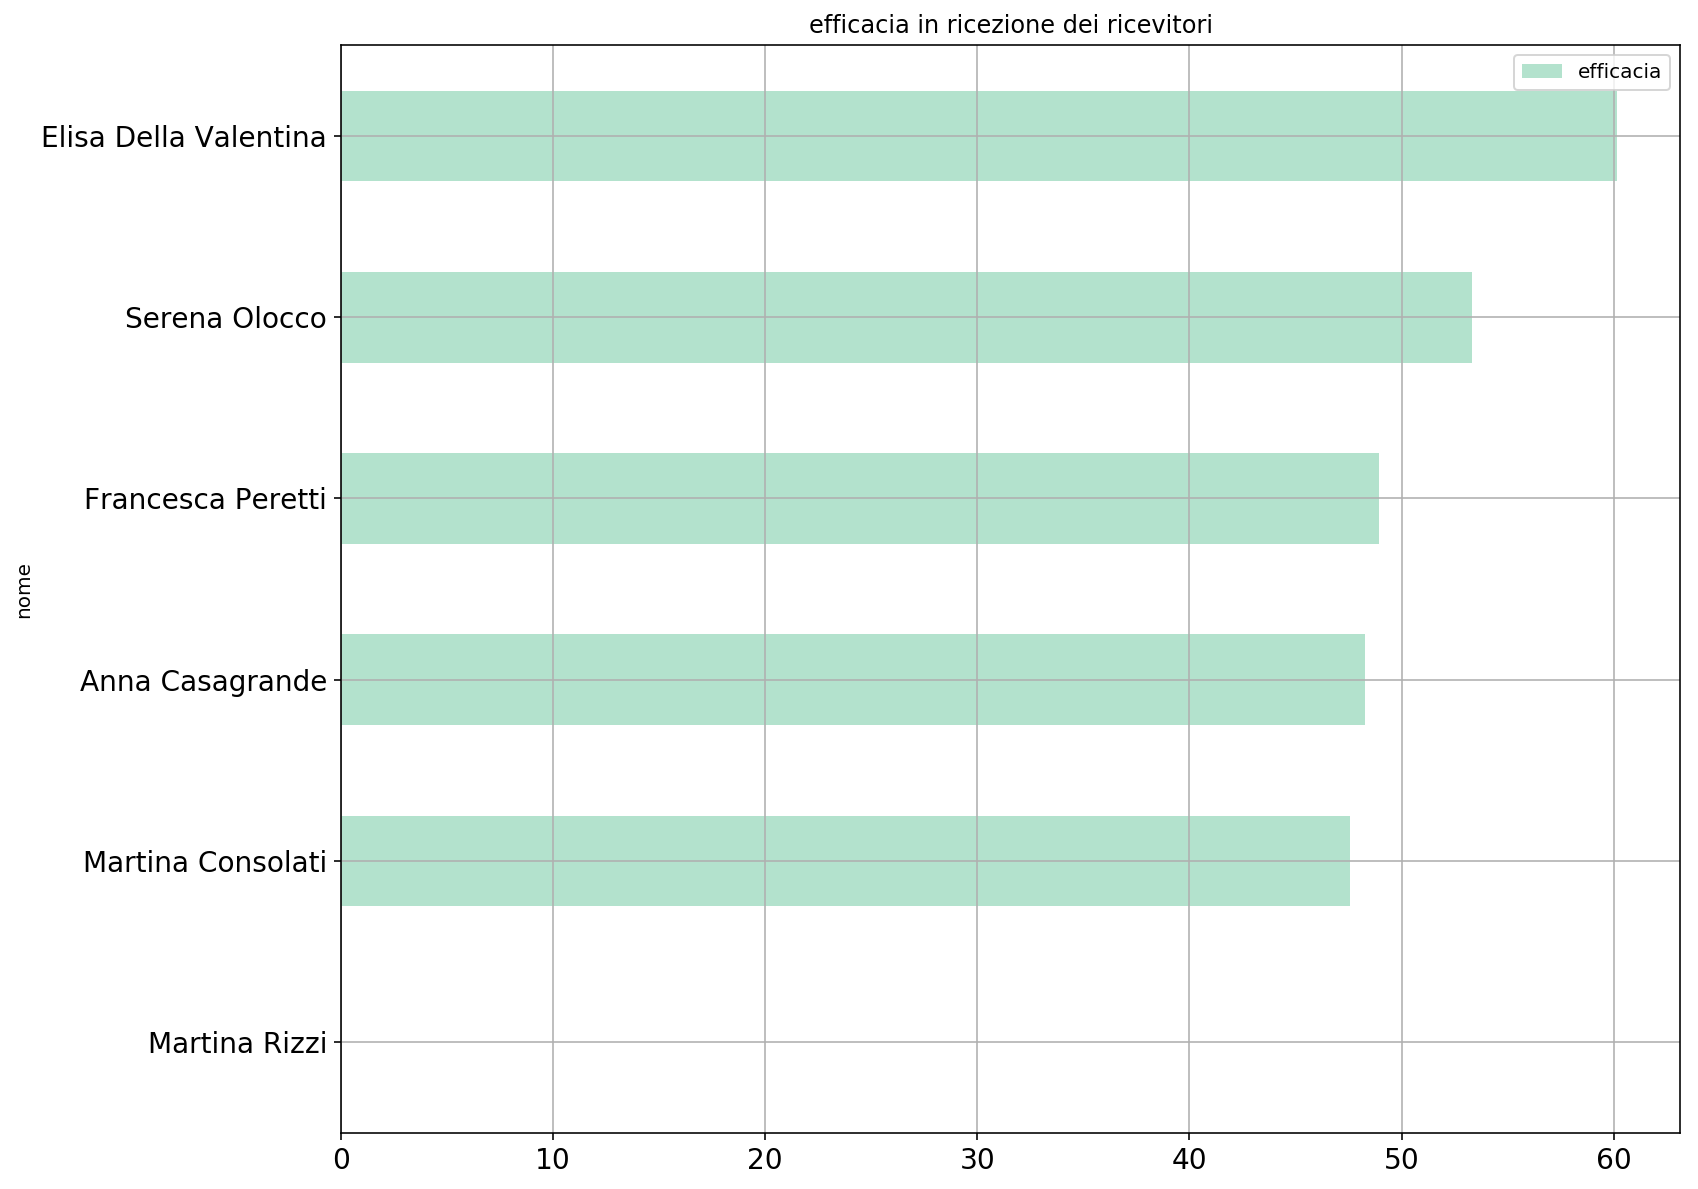

In [24]:
grafico_ricevitori = ricezione_totali_ricevitori.set_index("nome")[['efficacia']].plot.barh(
    title="efficacia in ricezione dei ricevitori",
    fontsize=14,
    linestyle='--',
    colormap="Pastel2",
    grid=True,
    linewidth=1.2,
    figsize=(12,10)
);


# Attacco

In [25]:
attacchi = pd.read_csv('attacchi.csv')

In [26]:
attacco_totali_atlete = attacchi[["A#","A+","A-","A/","A=","nome"]].pivot_table(index='nome',aggfunc='sum').sort_values(['A#','A='],ascending=False).head(10)
attacco_totali_atlete = attacco_totali_atlete.astype(int)

In [27]:
attacco_totali_atlete['punti-errori']=attacco_totali_atlete['A#']-attacco_totali_atlete['A='] 

In [28]:
attacco_totali_atlete['totale']=attacco_totali_atlete['A#']+attacco_totali_atlete['A+']+attacco_totali_atlete['A-']+attacco_totali_atlete['A/']+attacco_totali_atlete['A=']

In [29]:
attacco_totali_atlete

,A#,A+,A-,A/,A=,punti-errori,totale
nome,,,,,,,
Francesca Peretti,343,462,29,18,115,228,967
Serena Olocco,298,440,49,11,89,209,887
Alessia Ruele,177,182,14,11,39,138,423
Martina Consolati,148,292,41,8,39,109,528
Anna Casagrande,79,167,11,7,47,32,311
Stefania Della Valentina,76,92,8,3,30,46,209
Martina Rizzi,66,110,12,3,21,45,212
Licia Fondriest,64,106,7,6,27,37,210
Anna Gardumi,24,38,34,1,17,7,114


In [30]:
attacco_totali_atlete['efficienza %'] = round(((attacco_totali_atlete['A#'] - attacco_totali_atlete['A='] - attacco_totali_atlete['A/'])/attacco_totali_atlete['totale']*100),2)

In [31]:
attacco_totali_atlete

,A#,A+,A-,A/,A=,punti-errori,totale,efficienza %
nome,,,,,,,,
Francesca Peretti,343,462,29,18,115,228,967,21.72
Serena Olocco,298,440,49,11,89,209,887,22.32
Alessia Ruele,177,182,14,11,39,138,423,30.02
Martina Consolati,148,292,41,8,39,109,528,19.13
Anna Casagrande,79,167,11,7,47,32,311,8.04
Stefania Della Valentina,76,92,8,3,30,46,209,20.57
Martina Rizzi,66,110,12,3,21,45,212,19.81
Licia Fondriest,64,106,7,6,27,37,210,14.76
Anna Gardumi,24,38,34,1,17,7,114,5.26


In [32]:
attacco_totali_atlete = attacco_totali_atlete.reset_index().merge(totale_partite_giocate_atleta, left_on='nome', right_on='nome')

In [33]:
attacco_totali_atlete["totale punti %"] = round(attacco_totali_atlete["A#"] / attacco_totali_atlete["totale"]*100,2)

In [34]:
attacco_totali_atlete["totale errori %"] = round(attacco_totali_atlete["A="] / attacco_totali_atlete["totale"],2)

In [35]:
attacco_totali_atlete["totale muri subiti %"] = round(attacco_totali_atlete["A/"] / attacco_totali_atlete["totale"],2)

In [36]:
attacco_totali_atlete["media punti a partita"] = round(attacco_totali_atlete["A#"] / attacco_totali_atlete["partite giocate"],2)

In [37]:
attacco_totali_atlete["media errori a partita"] = round(attacco_totali_atlete["A="] / attacco_totali_atlete["partite giocate"],2)

In [38]:
attacco_totali_atlete["media punti - errori"] = round((attacco_totali_atlete["A#"] -attacco_totali_atlete["A="]) /  attacco_totali_atlete["partite giocate"],2)

In [39]:
attacco_totali_atlete

,nome,A#,A+,A-,A/,A=,punti-errori,totale,efficienza %,partite giocate,totale punti %,totale errori %,totale muri subiti %,media punti a partita,media errori a partita,media punti - errori
0,Francesca Peretti,343,462,29,18,115,228,967,21.72,28,35.47,0.12,0.02,12.25,4.11,8.14
1,Serena Olocco,298,440,49,11,89,209,887,22.32,26,33.60,0.10,0.01,11.46,3.42,8.04
2,Alessia Ruele,177,182,14,11,39,138,423,30.02,27,41.84,0.09,0.03,6.56,1.44,5.11
3,Martina Consolati,148,292,41,8,39,109,528,19.13,26,28.03,0.07,0.02,5.69,1.50,4.19
4,Anna Casagrande,79,167,11,7,47,32,311,8.04,14,25.40,0.15,0.02,5.64,3.36,2.29
5,Stefania Della Valentina,76,92,8,3,30,46,209,20.57,18,36.36,0.14,0.01,4.22,1.67,2.56
6,Martina Rizzi,66,110,12,3,21,45,212,19.81,20,31.13,0.10,0.01,3.30,1.05,2.25
7,Licia Fondriest,64,106,7,6,27,37,210,14.76,24,30.48,0.13,0.03,2.67,1.12,1.54
8,Anna Gardumi,24,38,34,1,17,7,114,5.26,27,21.05,0.15,0.01,0.89,0.63,0.26
9,Elisa Barozzi,2,4,1,0,3,-1,10,-10.00,15,20.00,0.30,0.00,0.13,0.20,-0.07


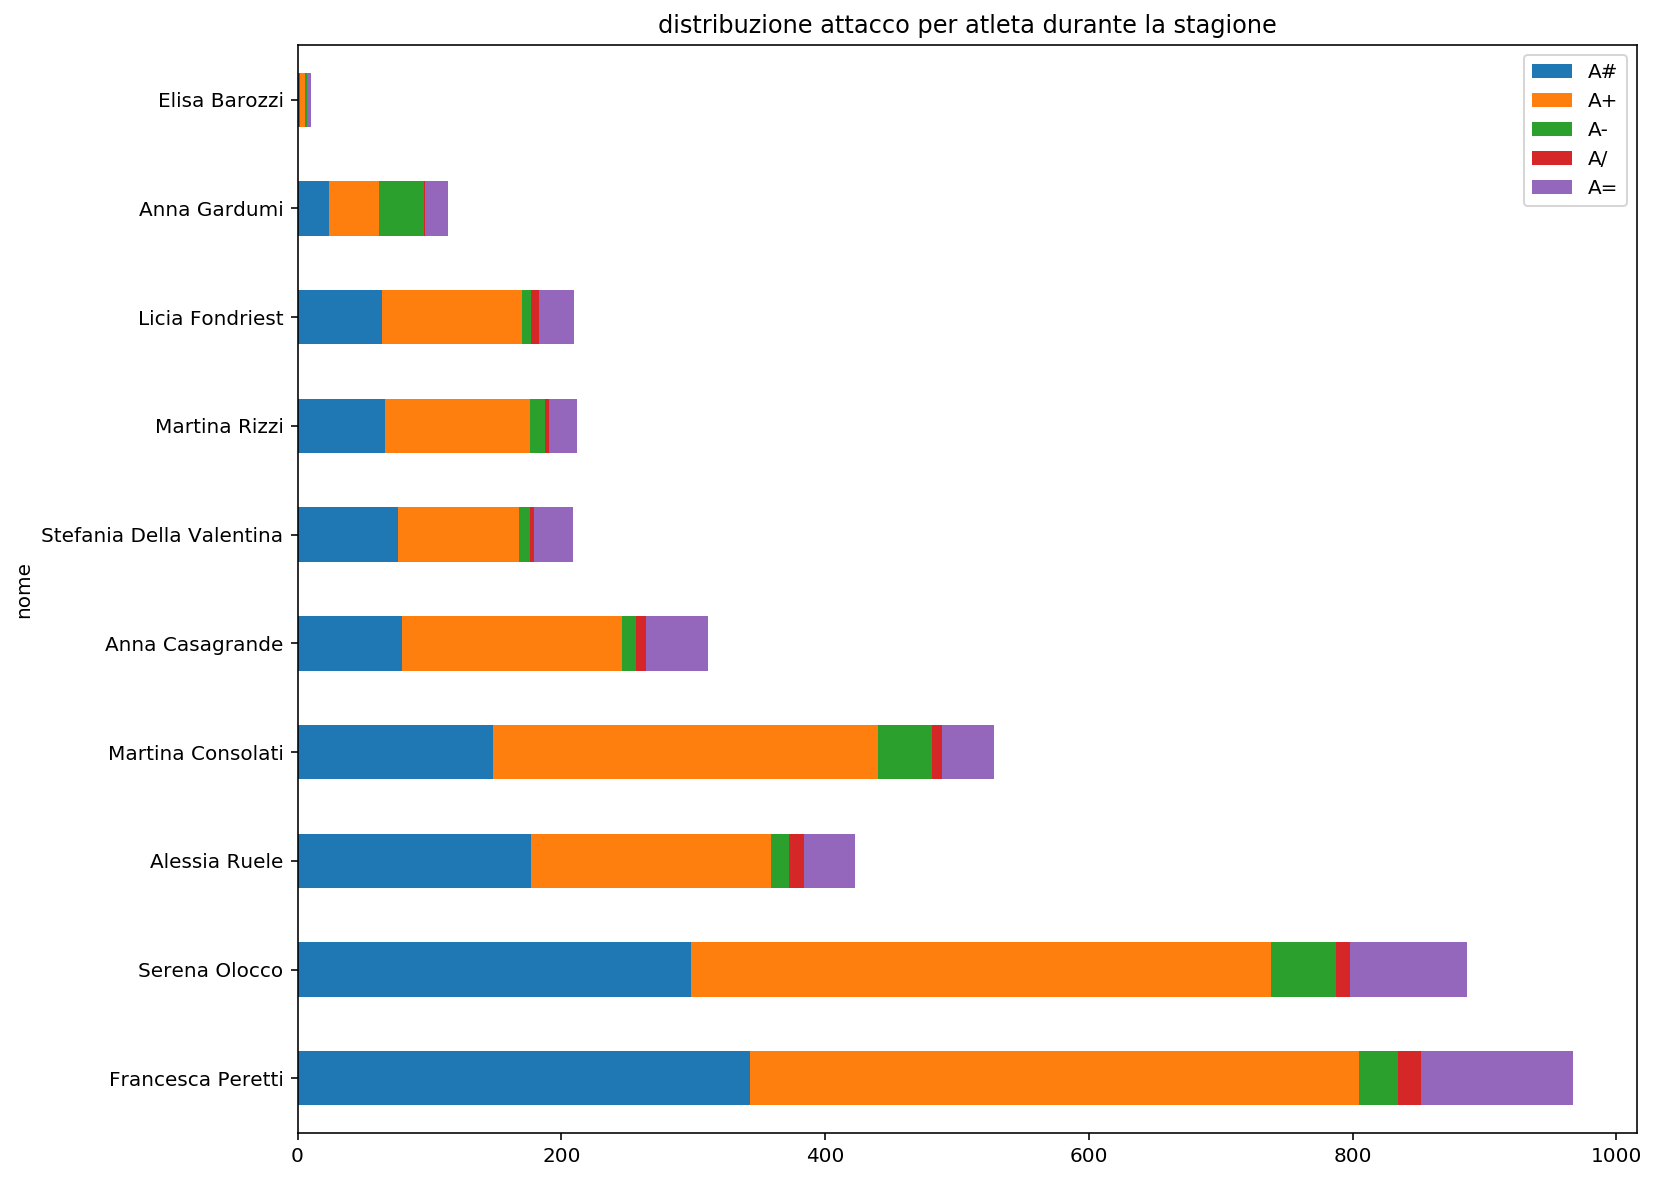

In [40]:
grafico_attacco_totali_atlete = attacco_totali_atlete.set_index("nome")[["A#","A+","A-","A/","A="]].plot.barh(stacked=True,figsize=[12,10],title="distribuzione attacco per atleta durante la stagione")

# Battuta

In [41]:
battute = pd.read_csv('battute.csv')

In [42]:
battute_totali_atlete = battute[["B#","B+","B-","B/","B=","nome"]].pivot_table(index='nome',aggfunc='sum').sort_values(['B#','B='],ascending=False).head(10)
battute_totali_atlete = battute_totali_atlete.astype(int)
battute_totali_atlete = battute_totali_atlete.reset_index().merge(totale_partite_giocate_atleta, left_on='nome', right_on='nome')

In [43]:
battute_totali_atlete["punti-errori"] = battute_totali_atlete['B#']-battute_totali_atlete['B=']
battute_totali_atlete=battute_totali_atlete.sort_values("punti-errori")

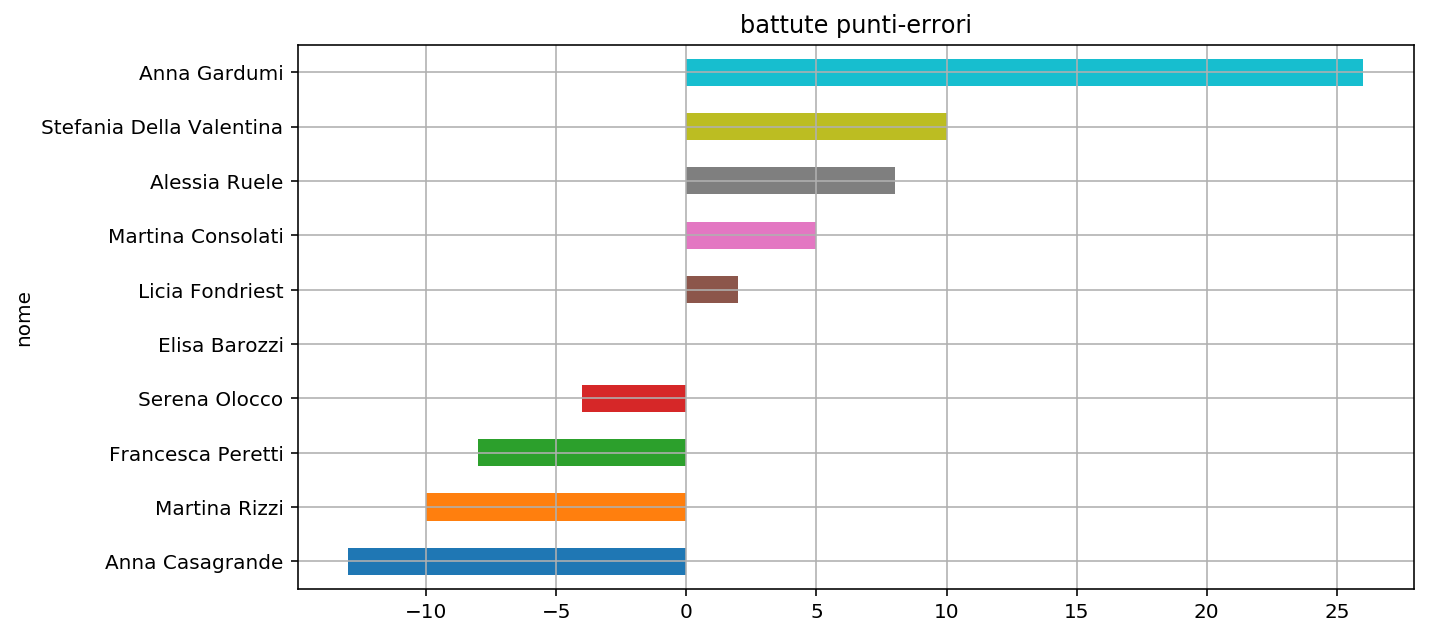

In [44]:
grafico_battute_totali_atlete=battute_totali_atlete.set_index("nome")["punti-errori"].plot.barh(title="battute punti-errori",grid=True,figsize=(10,5))

In [45]:
battute_totali_atlete

,nome,B#,B+,B-,B/,B=,partite giocate,punti-errori
7,Anna Casagrande,15,75,0,0,28,14,-13
9,Martina Rizzi,7,59,1,0,17,20,-10
0,Francesca Peretti,49,327,0,0,57,28,-8
5,Serena Olocco,23,265,0,0,27,26,-4
8,Elisa Barozzi,9,50,0,0,9,15,0
4,Licia Fondriest,24,174,0,0,22,24,2
6,Martina Consolati,20,205,1,0,15,26,5
3,Alessia Ruele,37,280,0,0,29,27,8
2,Stefania Della Valentina,41,167,0,0,31,18,10
1,Anna Gardumi,49,392,1,0,23,27,26


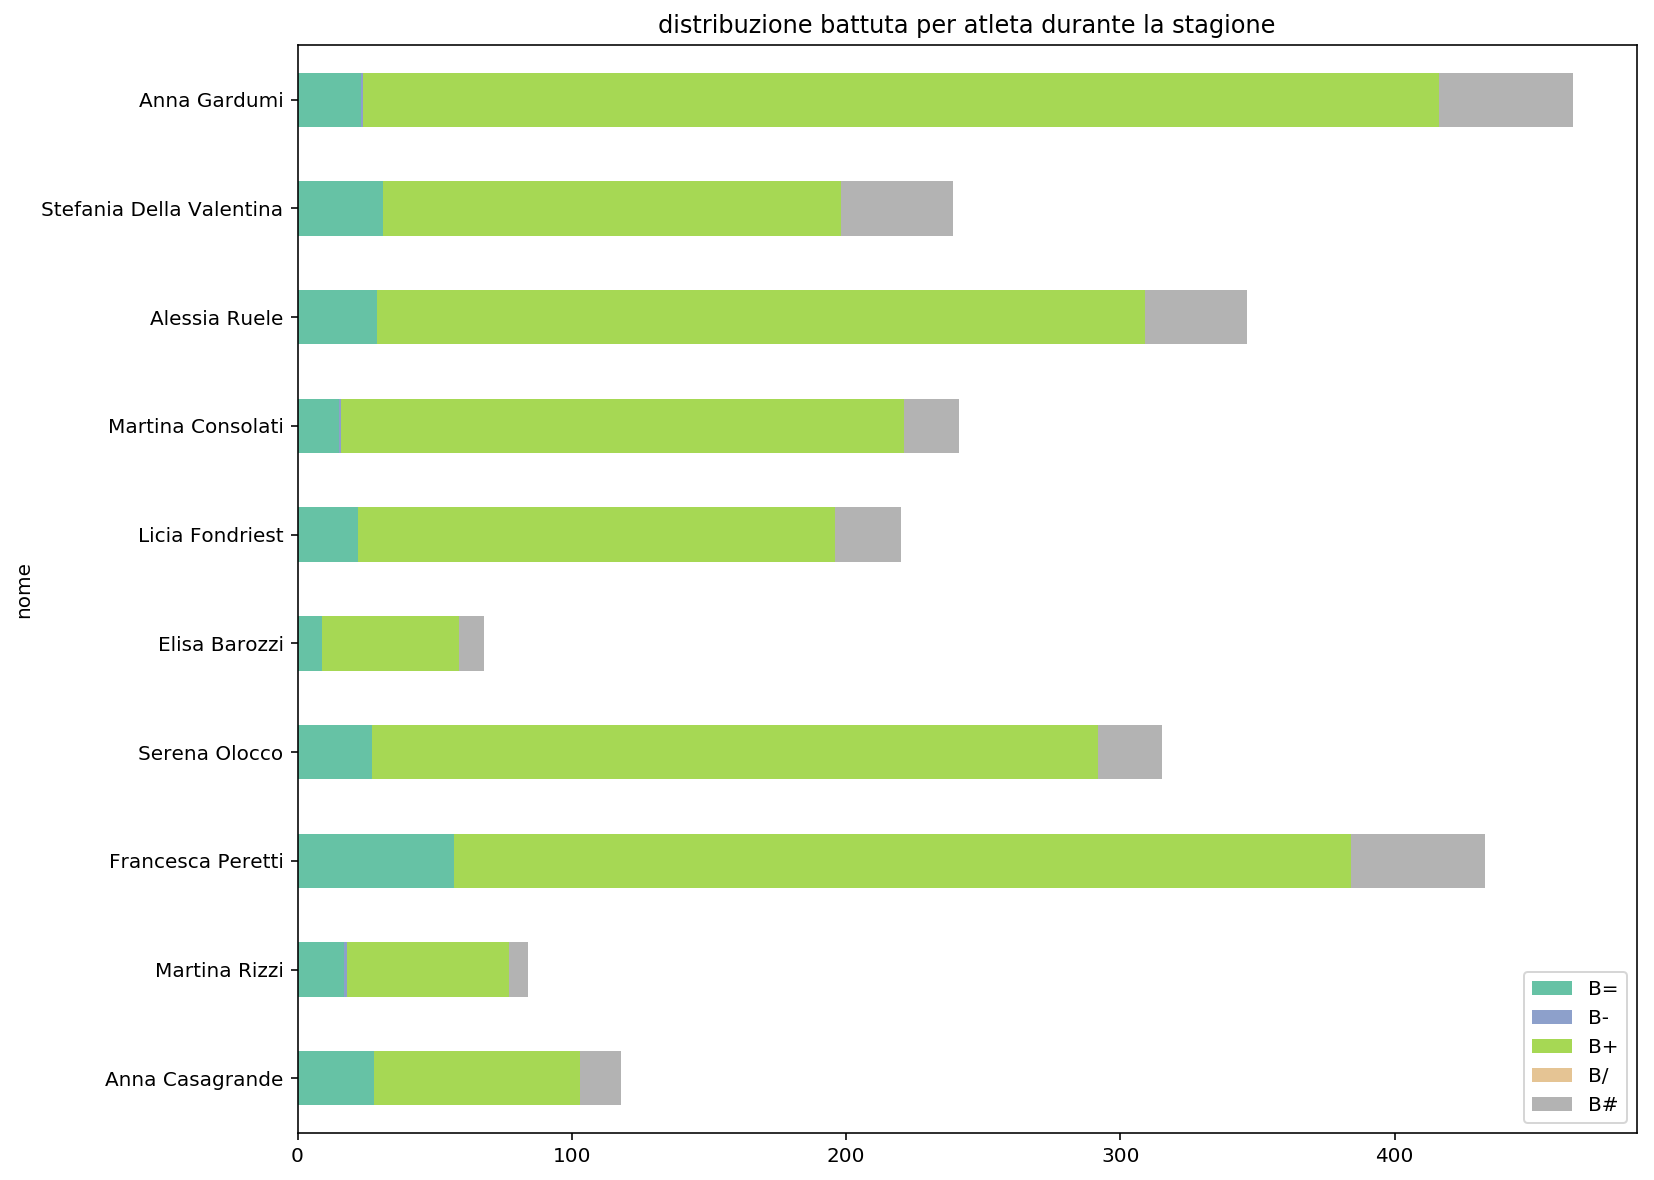

In [46]:
grafico_battute_totali_atlete = battute_totali_atlete.set_index("nome")[["B=","B-","B+","B/","B#"]].plot.barh(colormap="Set2",stacked=True,figsize=[12,10],title="distribuzione battuta per atleta durante la stagione")

In [47]:
battute_totali_atlete['totale'] = battute_totali_atlete["B#"] +  battute_totali_atlete["B="] +  battute_totali_atlete["B+"] +  battute_totali_atlete["B-"] +  battute_totali_atlete["B/"]

In [48]:
battute_totali_atlete ["media punti-errori partita"] = round((battute_totali_atlete["B#"] - battute_totali_atlete ["B="]) /  attacco_totali_atlete["partite giocate"],2)

In [49]:
battute_totali_atlete["media punti a partita"] = round( battute_totali_atlete["B#"]  /  attacco_totali_atlete["partite giocate"],2)

In [50]:
battute_totali_atlete["media errori a partita"] = round( battute_totali_atlete["B="]  /  attacco_totali_atlete["partite giocate"],2)

In [51]:
battute_totali_atlete.sort_values("totale")

,nome,B#,B+,B-,B/,B=,partite giocate,punti-errori,totale,media punti-errori partita,media punti a partita,media errori a partita
8,Elisa Barozzi,9,50,0,0,9,15,0,68,0.00,0.33,0.33
9,Martina Rizzi,7,59,1,0,17,20,-10,84,-0.67,0.47,1.13
7,Anna Casagrande,15,75,0,0,28,14,-13,118,-0.54,0.62,1.17
4,Licia Fondriest,24,174,0,0,22,24,2,220,0.14,1.71,1.57
2,Stefania Della Valentina,41,167,0,0,31,18,10,239,0.37,1.52,1.15
6,Martina Consolati,20,205,1,0,15,26,5,241,0.25,1.00,0.75
5,Serena Olocco,23,265,0,0,27,26,-4,315,-0.22,1.28,1.50
3,Alessia Ruele,37,280,0,0,29,27,8,346,0.31,1.42,1.12
0,Francesca Peretti,49,327,0,0,57,28,-8,433,-0.29,1.75,2.04
1,Anna Gardumi,49,392,1,0,23,27,26,465,1.00,1.88,0.88


# MURO

In [52]:
muri = pd.read_csv('muri.csv')

In [53]:
muri_totali_atlete = muri[["M#","M=","nome"]].pivot_table(index='nome',aggfunc='sum').sort_values(['M#','M='],ascending=False).head(10)
muri_totali_atlete = muri_totali_atlete.astype(int)

In [54]:
muri_totali_atlete = muri_totali_atlete.reset_index().merge(totale_partite_giocate_atleta, left_on='nome', right_on='nome')

In [55]:
muri_totali_atlete['totale'] = muri_totali_atlete["M#"] + muri_totali_atlete["M="]

In [56]:
muri_totali_atlete['punt-errori'] = muri_totali_atlete["M#"] - muri_totali_atlete["M="]

In [57]:
muri_totali_atlete['media muri punto a partita'] =  round(muri_totali_atlete["M#"] / muri_totali_atlete['partite giocate'],2)

In [58]:
lmuri_totali_atlete=muri_totali_atlete.rename(columns={"M#":"punti a muro","M=": "invasioni a muro"})

In [59]:
lmuri_totali_atlete = muri_totali_atlete.sort_values("media muri punto a partita",ascending=True)

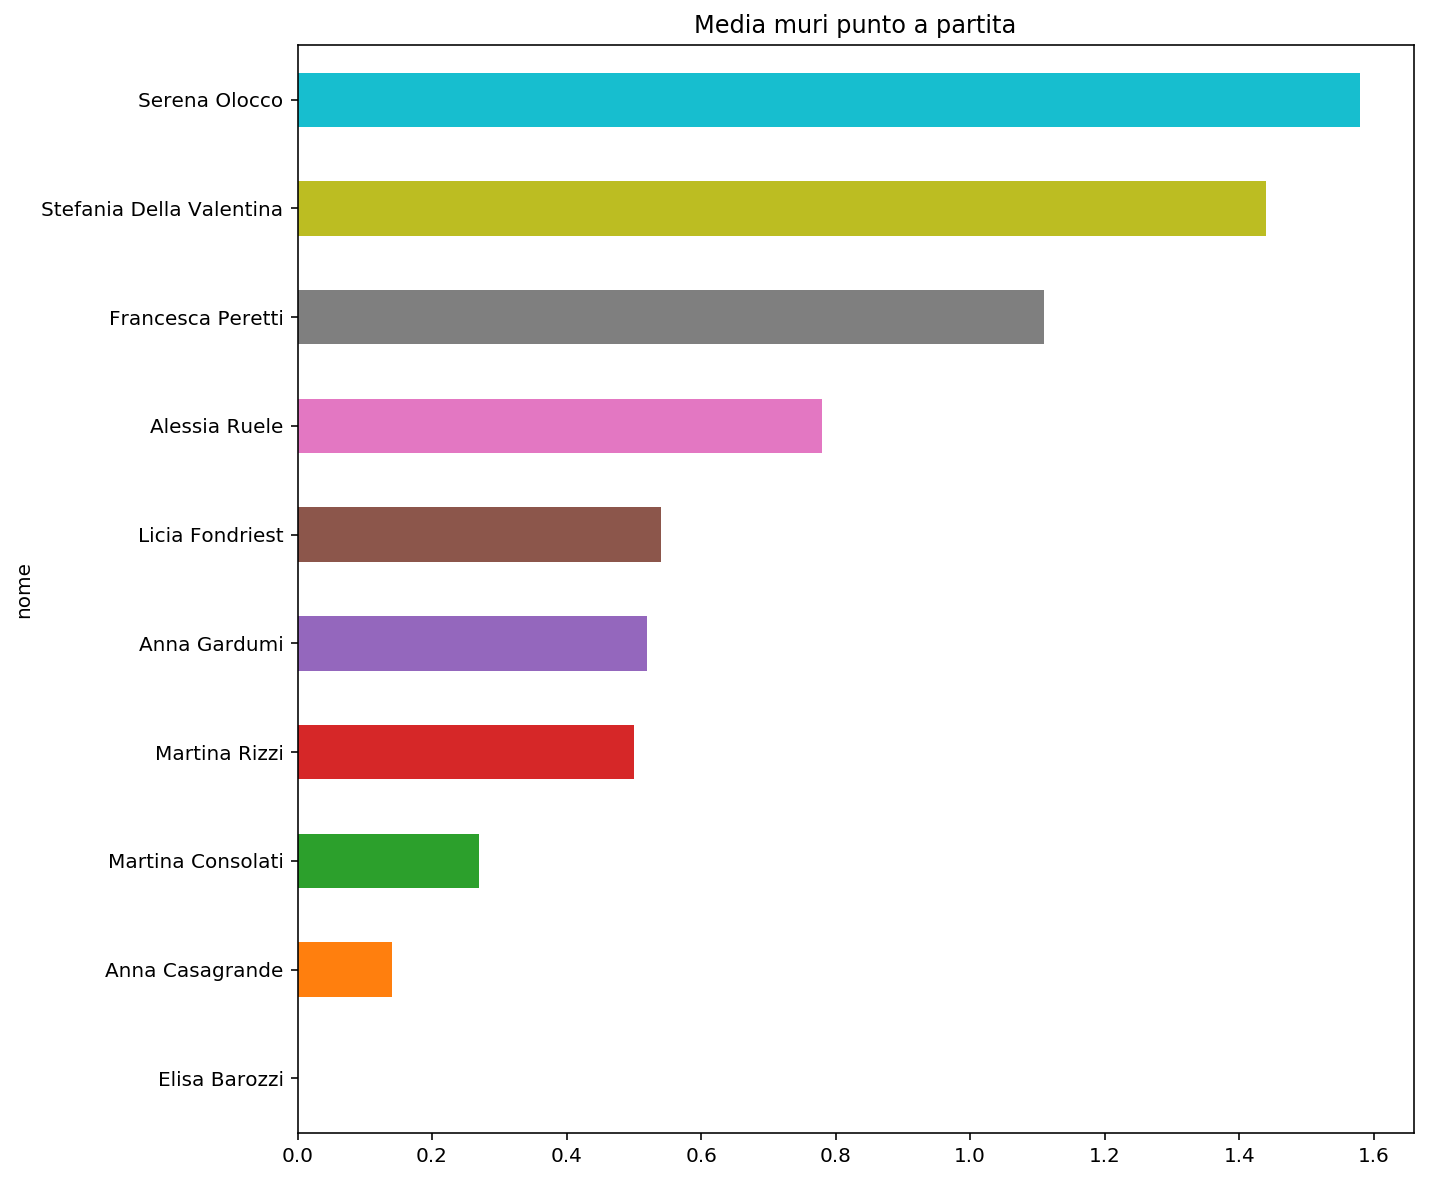

In [60]:
grafico_muri_totali = lmuri_totali_atlete.set_index("nome")["media muri punto a partita"].plot.barh(title="Media muri punto a partita",figsize=(10,10))

# DOPPIE

In [61]:
doppie = pd.read_csv('doppie.csv')

In [62]:
doppie_totali_atlete = doppie[["P=","nome"]].pivot_table(index='nome',aggfunc='sum').sort_values(['P='],ascending=False).head(11)
doppie_totali_atlete = doppie_totali_atlete.astype(int)

In [63]:
doppie_totali_atlete = doppie_totali_atlete.reset_index().merge(totale_partite_giocate_atleta, left_on='nome', right_on='nome')

In [64]:
doppie_totali_atlete['media doppie a partita'] = round(doppie_totali_atlete["P="] / doppie_totali_atlete['partite giocate'],2)

In [65]:
doppie_totali_atlete

,nome,P=,partite giocate,media doppie a partita
0,Anna Gardumi,43,27,1.59
1,Elisa Barozzi,12,15,0.80
2,Anna Maffei,6,2,3.00
3,Elisa Della Valentina,2,29,0.07
4,Alessia Ruele,2,27,0.07
5,Licia Fondriest,1,24,0.04
6,Martina Consolati,1,26,0.04
7,Stefania Della Valentina,0,18,0.00
8,Serena Olocco,0,26,0.00
9,Martina Rizzi,0,20,0.00


# PUNTI ED ERRORI

In [66]:
errori = totale_partite_giocate_atleta.reset_index().merge(battute_totali_atlete[["nome","B="]], left_on='nome', right_on='nome',how='left')[["nome","partite giocate","B="]].fillna(0)
errori = errori.merge(attacco_totali_atlete[["nome","A="]], left_on='nome', right_on='nome',how='left').fillna(0)
errori = errori.merge(muri_totali_atlete[["nome","M="]], left_on='nome', right_on='nome',how='left').fillna(0)
errori = errori.merge(doppie_totali_atlete[["nome","P="]], left_on='nome', right_on='nome',how='left').fillna(0)
errori = errori.merge(ricezione_totali_atlete[["nome","R="]], left_on='nome', right_on='nome',how='left').fillna(0)
errori.rename(columns={"A=":'errori attacco',"M=":'errori muro',"B=":'errori battuta',"R=":'errori ricezione',"P=":'errori doppia'}, inplace=True)
errori['errori battuta'] = errori['errori battuta'].astype(int)
errori['errori muro'] = errori['errori muro'].astype(int)
errori['errori attacco'] = errori['errori attacco'].astype(int)
errori['errori ricezione'] = errori['errori ricezione'].astype(int)
errori['errori doppia'] = errori['errori doppia'].astype(int)
errori['totale errori'] = errori['errori battuta'] + errori['errori muro'] + errori['errori attacco'] + errori['errori ricezione'] + errori['errori doppia']

In [67]:
punti = totale_partite_giocate_atleta.reset_index().merge(battute_totali_atlete[["nome","B#"]], left_on='nome', right_on='nome',how='left')[["nome","partite giocate","B#"]].fillna(0)
punti = punti.merge(attacco_totali_atlete[["nome","A#"]], left_on='nome', right_on='nome',how='left').fillna(0)
punti = punti.merge(muri_totali_atlete[["nome","M#"]], left_on='nome', right_on='nome',how='left').fillna(0)
punti.rename(columns={"A#":'punti attacco',"M#":'punti muro',"B#":'punti battuta'}, inplace=True)
punti['punti battuta'] = punti['punti battuta'].astype(int)
punti['punti muro'] = punti['punti muro'].astype(int)
punti['punti attacco'] = punti['punti attacco'].astype(int)
punti['totale punti'] = punti['punti battuta'] + punti['punti muro'] + punti['punti attacco']

In [68]:
punti_errori = punti.merge(errori, left_on='nome', right_on='nome',how='left').fillna(0)
punti_errori = punti_errori.drop(["partite giocate_y"], axis=1)
punti_errori=punti_errori.set_index("nome").rename(columns={"partite giocate_x":"partite giocate"})
punti_errori=punti_errori.sort_values("totale punti",ascending=False)
punti_errori["media punti per partita"] = round(punti_errori["totale punti"] / punti_errori["partite giocate"],2)
punti_errori["media errori per partita"] = round(punti_errori["totale errori"] / punti_errori["partite giocate"],2)
punti_errori["punti-errori"] = punti_errori["totale punti"] - punti_errori["totale errori"]
punti_errori["punti-errori"] = punti_errori["totale punti"] - punti_errori["totale errori"]
punti_errori["media punti-errori per partita"] = round((punti_errori["totale punti"] - punti_errori["totale errori"]) / punti_errori["partite giocate"],2)

In [69]:
punti_errori = punti_errori.sort_values("media punti-errori per partita",ascending=False)

In [70]:
punti_errori_atleteC = punti_errori.drop(["Chiara Bortot","Anna Maffei","Jana Belic","Laura Maffei"])

In [71]:
punti_errori_atleteC= punti_errori_atleteC.sort_values("media punti per partita",ascending=False)

In [72]:
punti_errori_atleteC

,partite giocate,punti battuta,punti attacco,punti muro,totale punti,errori battuta,errori attacco,errori muro,errori doppia,errori ricezione,totale errori,media punti per partita,media errori per partita,punti-errori,media punti-errori per partita
nome,,,,,,,,,,,,,,,
Francesca Peretti,28,49,343,31,423,57,115,0,0,58,230,15.11,8.21,193,6.89
Serena Olocco,26,23,298,41,362,27,89,7,0,5,128,13.92,4.92,234,9.00
Alessia Ruele,27,37,177,21,235,29,39,7,2,2,79,8.70,2.93,156,5.78
Stefania Della Valentina,18,41,76,26,143,31,30,3,0,1,65,7.94,3.61,78,4.33
Anna Casagrande,14,15,79,2,96,28,47,0,0,30,105,6.86,7.50,-9,-0.64
Martina Consolati,26,20,148,7,175,15,39,1,1,40,96,6.73,3.69,79,3.04
Licia Fondriest,24,24,64,13,101,22,27,2,1,1,53,4.21,2.21,48,2.00
Martina Rizzi,20,7,66,10,83,17,21,1,0,4,43,4.15,2.15,40,2.00
Anna Gardumi,27,49,24,14,87,23,17,8,43,2,93,3.22,3.44,-6,-0.22


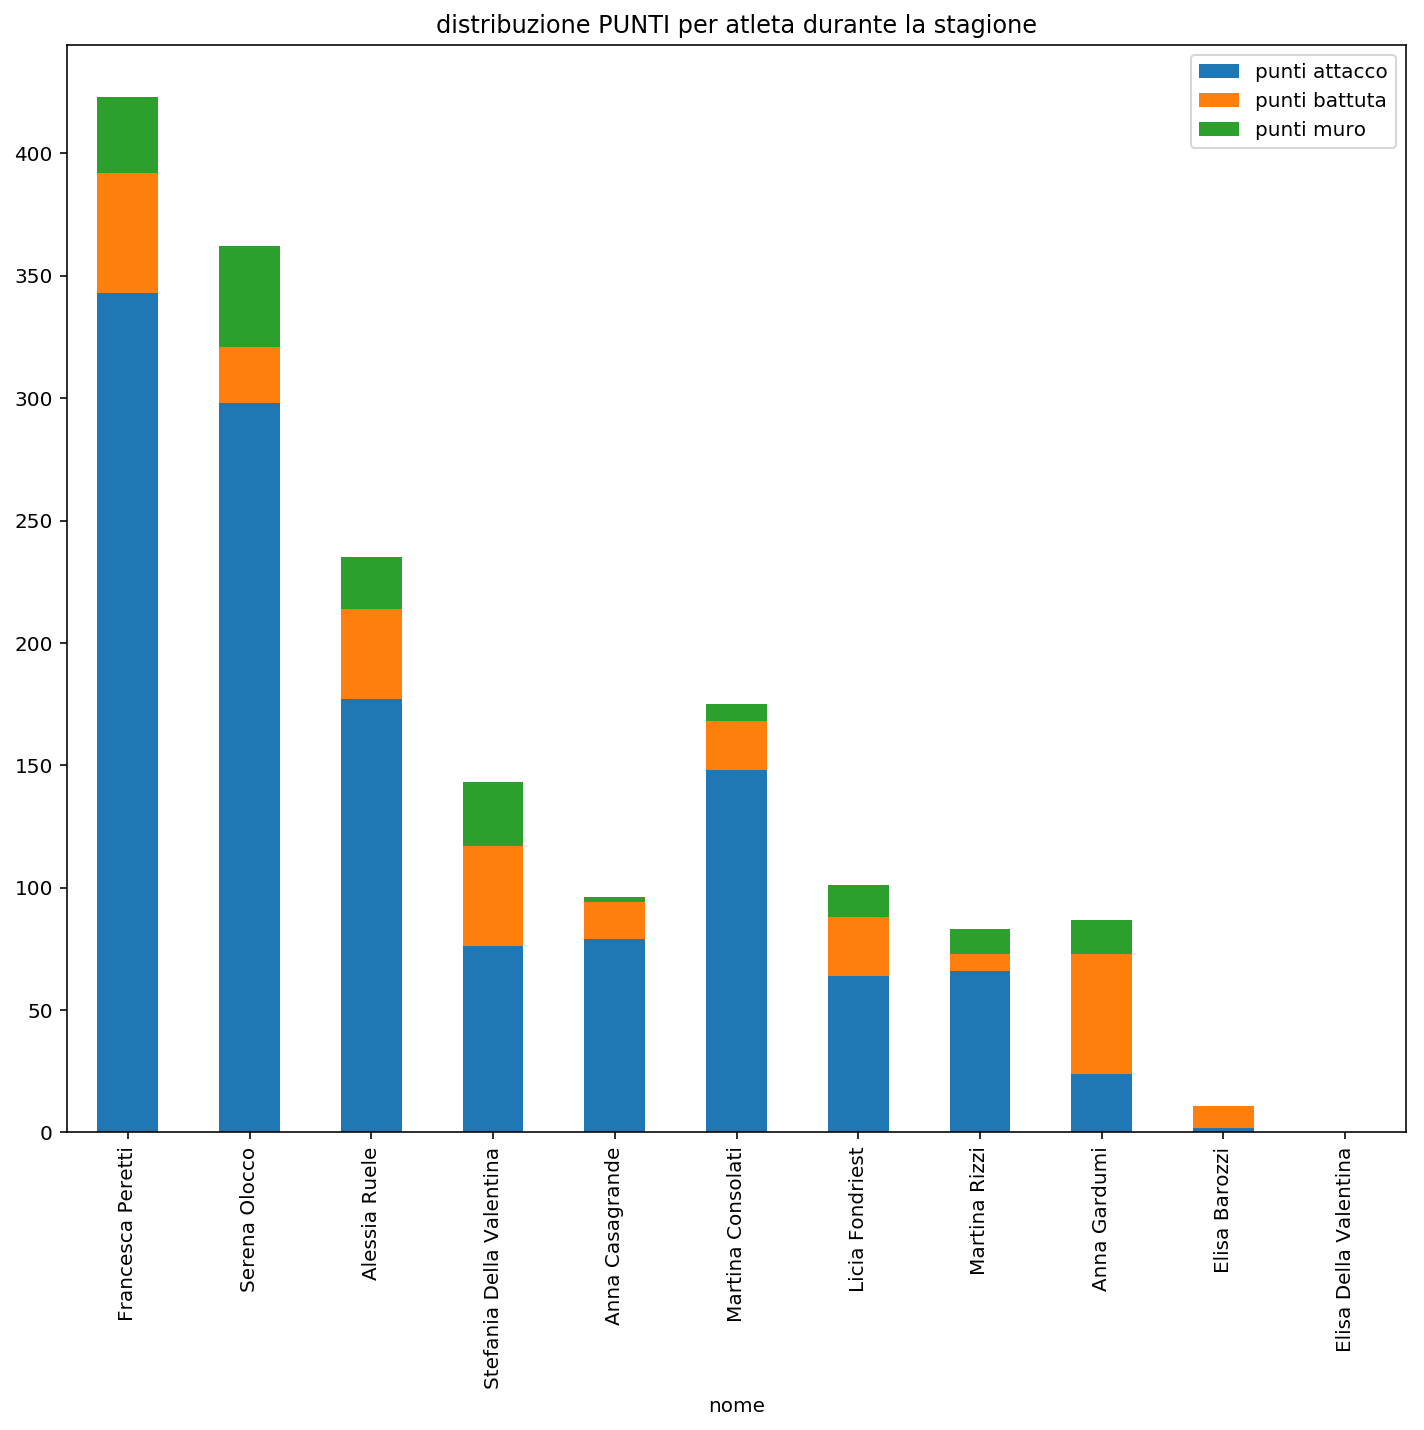

In [73]:
grafico_punti_atleteC = punti_errori_atleteC[["punti attacco","punti battuta","punti muro"]].plot.bar(stacked=True,figsize=[12,10],title="distribuzione PUNTI per atleta durante la stagione")

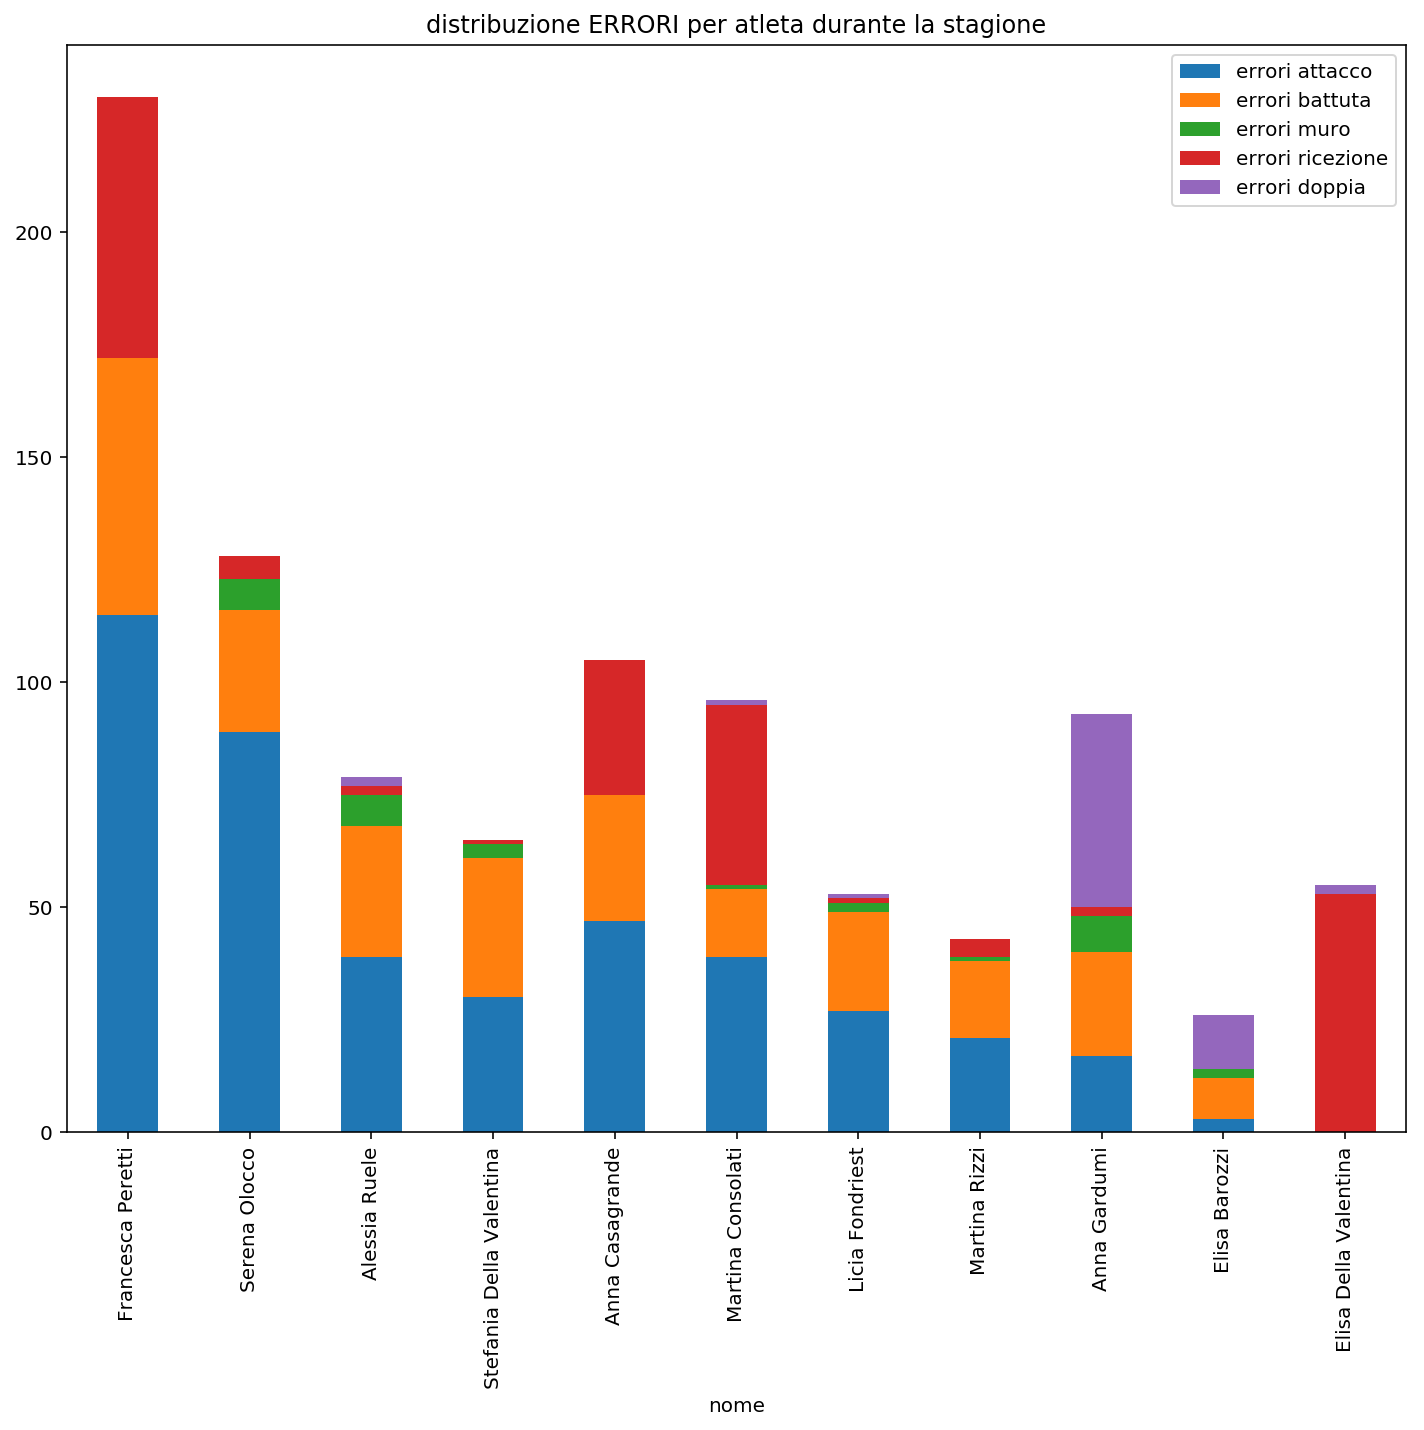

In [74]:
grafico_errori_atleteC = punti_errori_atleteC[["errori attacco","errori battuta","errori muro","errori ricezione","errori doppia"]].plot.bar(stacked=True,figsize=[12,10],title="distribuzione ERRORI per atleta durante la stagione")

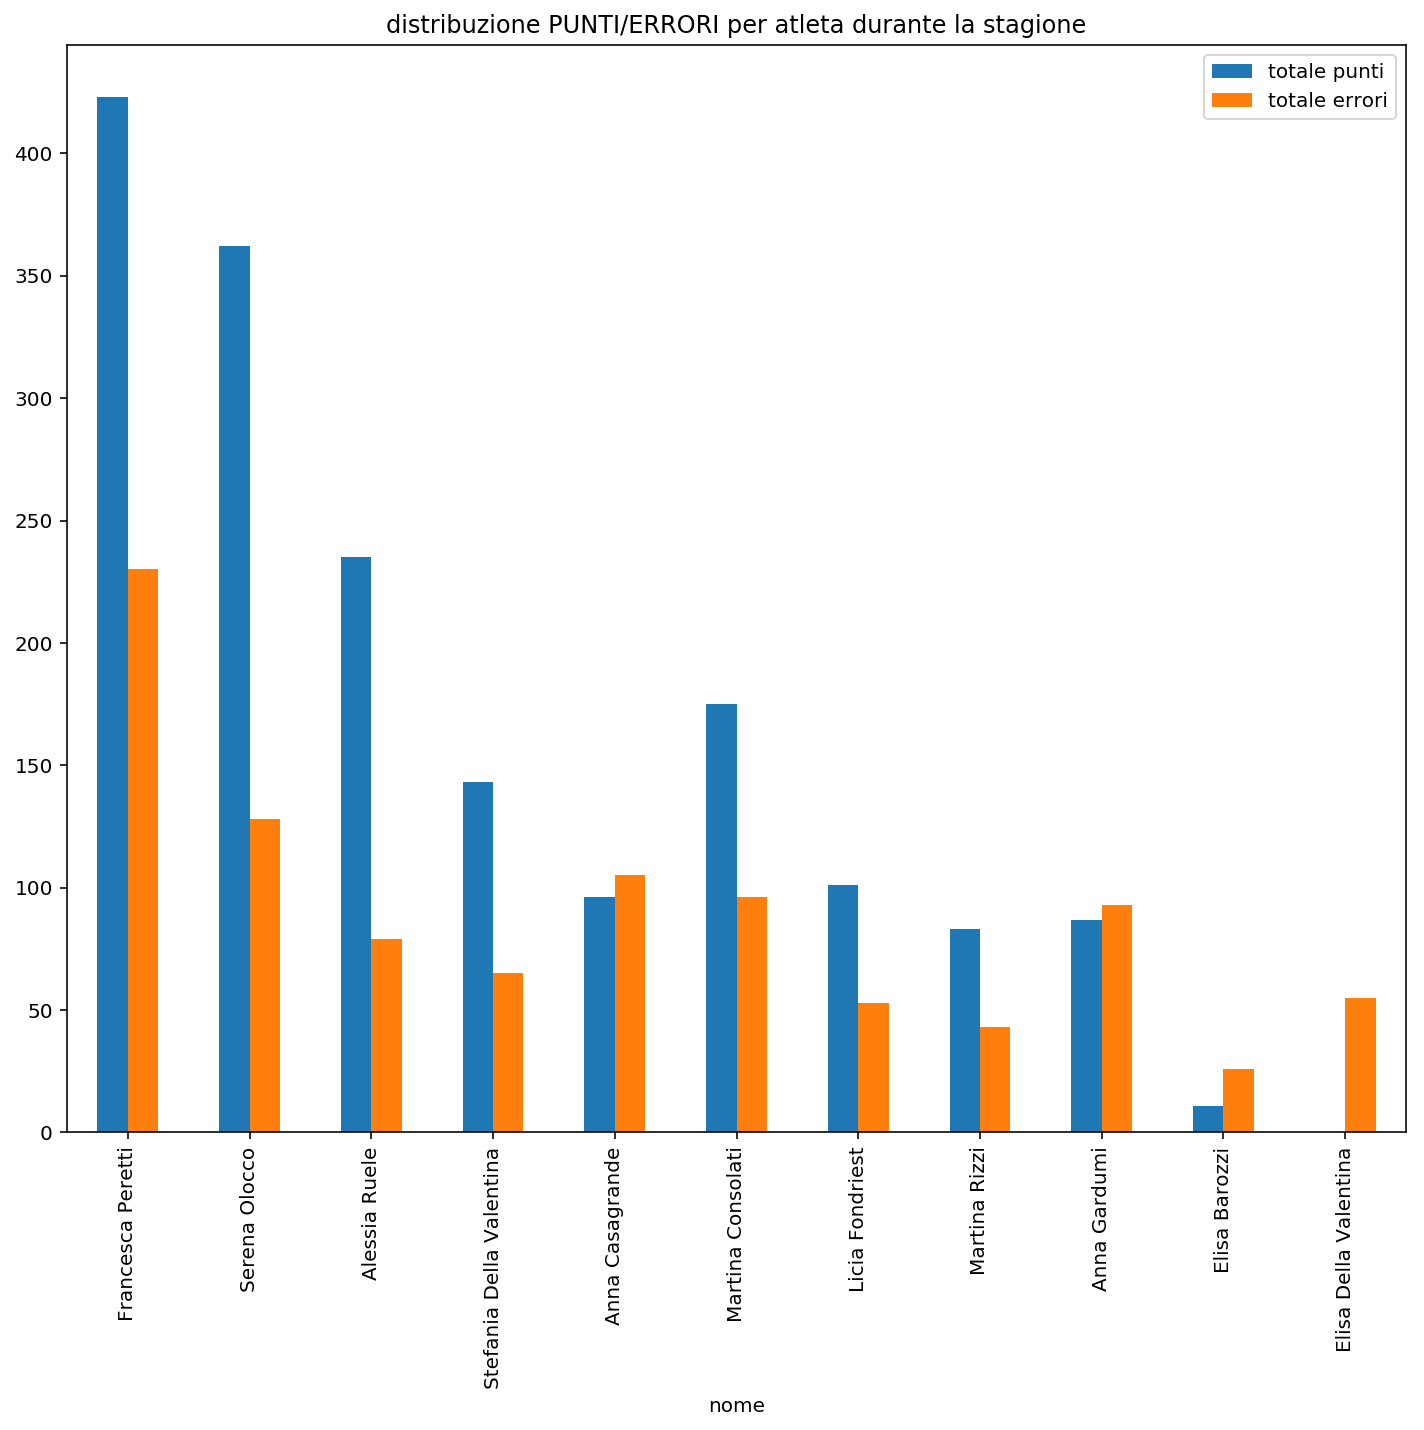

In [75]:
grafico_punti_errori_atleteC = punti_errori_atleteC[["totale punti","totale errori"]].plot.bar(figsize=[12,10],title="distribuzione PUNTI/ERRORI per atleta durante la stagione")

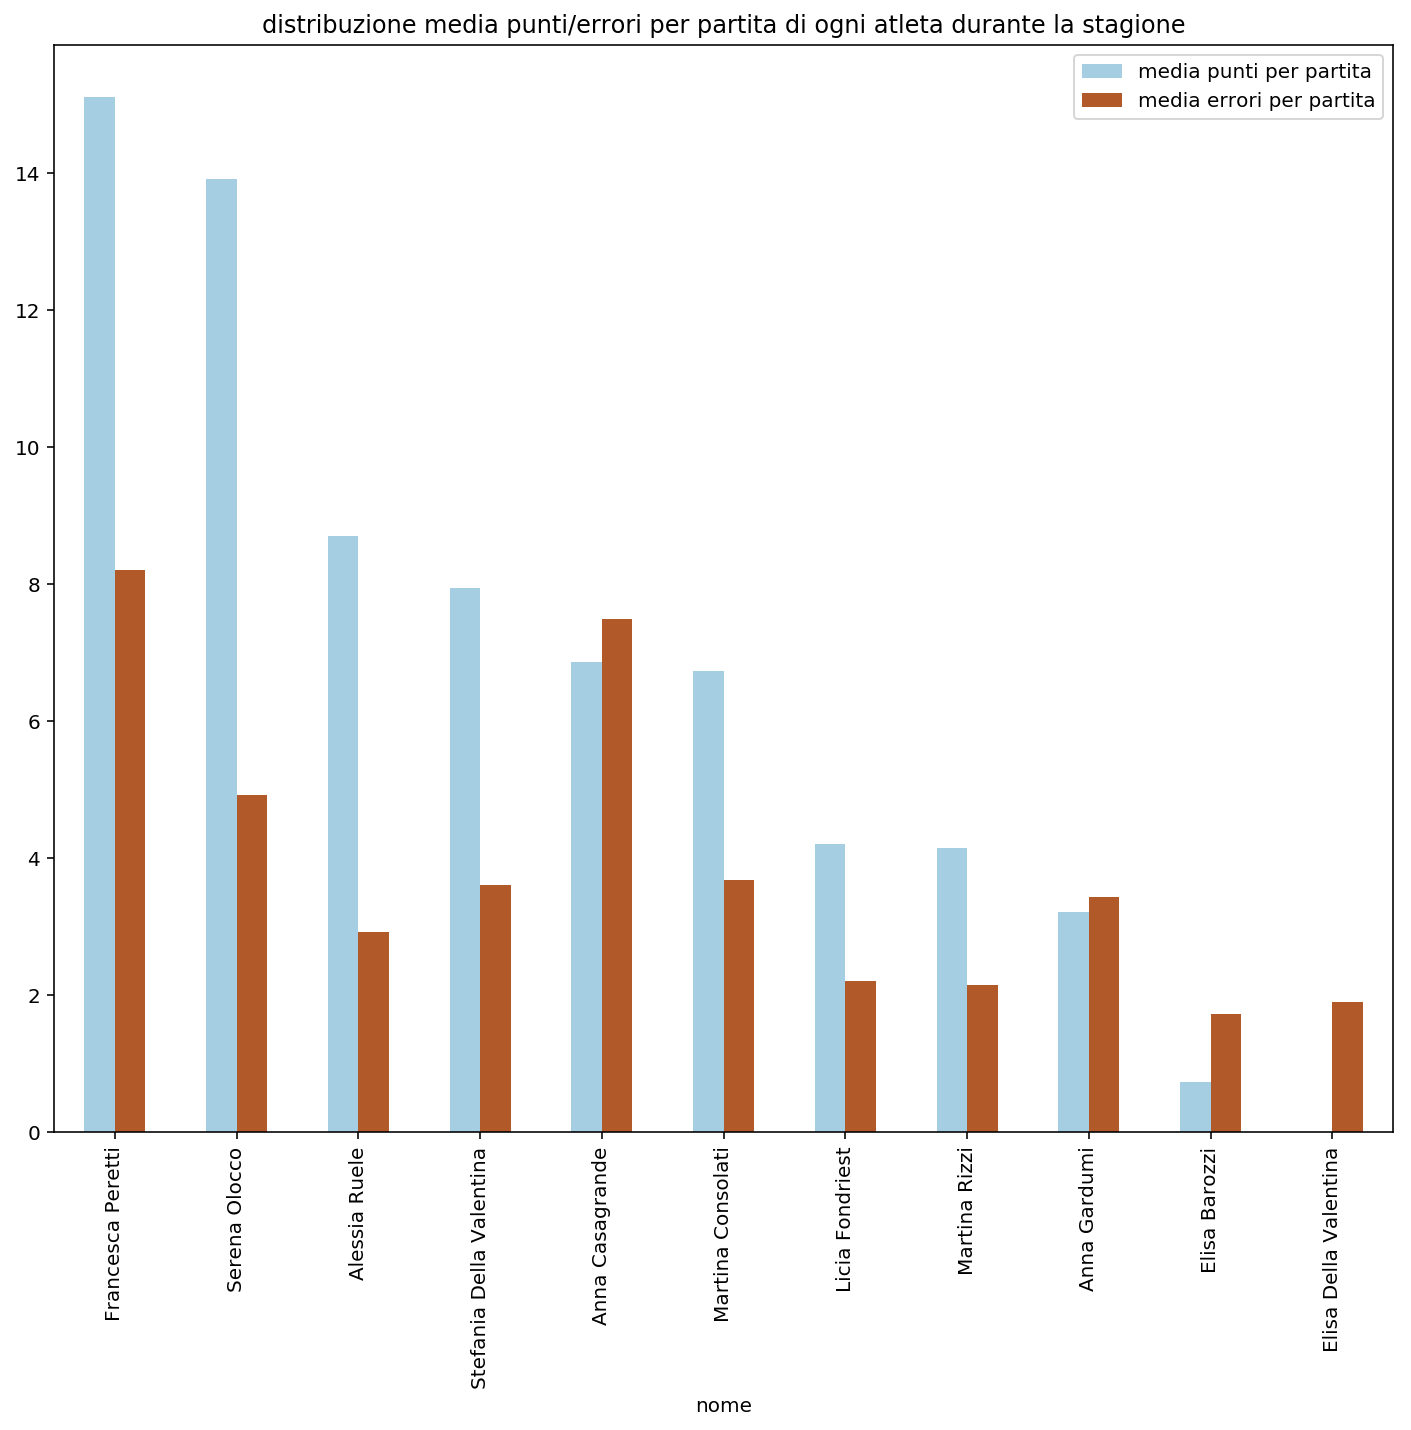

In [76]:
grafico_punti_errori_atleteC = punti_errori_atleteC[["media punti per partita","media errori per partita"]].plot.bar(colormap="Paired",figsize=[12,10],title="distribuzione media punti/errori per partita di ogni atleta durante la stagione")

# ATLETE

In [78]:
# statistiche atlete
def getDataPlayer(nome):
    gare = totale_partite_giocate_atleta[(totale_partite_giocate_atleta.nome==nome)]["partite giocate"].values[0]
    ricezione=ricezione_totali_atlete[ricezione_totali_atlete.nome==nome]
    doppie=doppie_totali_atlete[doppie_totali_atlete.nome==nome]
    attacco=attacco_totali_atlete[attacco_totali_atlete.nome==nome]
    muro=muri_totali_atlete[muri_totali_atlete.nome==nome]
    battuta = battute_totali_atlete[battute_totali_atlete.nome==nome]
    puntierrori = punti_errori.reset_index()
    p_e = puntierrori[puntierrori.nome==nome]
    p_e = p_e.set_index("nome")
    p_e
    #graficopunti_p_e = p_e[["punti attacco","punti battuta","punti muro"]].plot.barh(figsize=(10,5),stacked=True,title="distribuzione PUNTI durante la stagione")
    #grafico_errori_p_e = p_e[["errori attacco","errori battuta","errori muro","errori ricezione","errori doppia"]].plot.barh(stacked=True,figsize=[10,5],title="distribuzione ERRORI durante la stagione")
    #grafico_punti_errori_p_e = p_e[["totale punti","totale errori"]].plot.bar(figsize=[5,5],title="distribuzione PUNTI/ERRORI durante la stagione")
    #grafico_punti_errori_p_e = p_e[["media punti per partita","media errori per partita"]].plot.bar(colormap="Paired",figsize=[5,5],title="distribuzione media punti/errori per partita di ogni atleta durante la stagione")
    if ricezione.size > 0:
        ricezione
        ricezione=ricezione.set_index("nome")                
        ricezione=ricezione.rename(columns={"R#":"perfette","R+":"giocabili","R-":"non giocabili","R/":"oltre la rete","R=":"ace subiti","positivita":"positività %","efficacia":"efficacia %","efficienza":"efficienza %" })
        #grafico_distro_ricezione = ricezione[["perfette","giocabili","non giocabili","oltre la rete","ace subiti"]].plot.barh(stacked=True,figsize=[10,5],title="distribuzione RICEZIONE durante la stagione")
    if attacco.size > 0:
        attacco
        attacco=attacco.set_index("nome")
        attacco=attacco.rename(columns={"A#":"punto","A+":"difeso da avversario","A-":"bagher o palleggio","A/":"murato","A=":"errore" })
        #grafico_distro_attacco = attacco[["punto","difeso da avversario","bagher o palleggio","murato","errore"]].plot.barh(stacked=True,figsize=[10,5],title="distribuzione ATTACCO durante la stagione")  
    if muro.size > 0:
        muro=muro.set_index("nome")
        muro = muro.rename(columns={"M#":"punto","M=":"errore"})
    return({"gare":gare,"ricezione":ricezione,"doppie":doppie,"attacco":attacco,"muro":muro,"battuta":battuta,"puntierrori":p_e})
datigiocatore=getDataPlayer("Stefania Della Valentina")


In [79]:
datigiocatore['gare']

18

In [80]:
datigiocatore['puntierrori']

,partite giocate,punti battuta,punti attacco,punti muro,totale punti,errori battuta,errori attacco,errori muro,errori doppia,errori ricezione,totale errori,media punti per partita,media errori per partita,punti-errori,media punti-errori per partita
nome,,,,,,,,,,,,,,,
Stefania Della Valentina,18,41,76,26,143,31,30,3,0,1,65,7.94,3.61,78,4.33


In [81]:
datigiocatore['muro']

,punto,errore,partite giocate,totale,punt-errori,media muri punto a partita
nome,,,,,,
Stefania Della Valentina,26,3,18,29,23,1.44


In [82]:
datigiocatore['battuta']

,nome,B#,B+,B-,B/,B=,partite giocate,punti-errori,totale,media punti-errori partita,media punti a partita,media errori a partita
2,Stefania Della Valentina,41,167,0,0,31,18,10,239,0.37,1.52,1.15


In [83]:
datigiocatore['ricezione']

,perfette,giocabili,non giocabili,oltre la rete,ace subiti,totale,positività %,efficacia %,efficienza %,partite giocate,media ace subiti per partita
nome,,,,,,,,,,,
Stefania Della Valentina,1,2,0,1,1,5,60.0,20.0,0.0,18,0.06


#### ATTACCO

In [86]:
datigiocatore=getDataPlayer("Stefania Della Valentina")


In [87]:
datigiocatore['ricezione']

,perfette,giocabili,non giocabili,oltre la rete,ace subiti,totale,positività %,efficacia %,efficienza %,partite giocate,media ace subiti per partita
nome,,,,,,,,,,,
Stefania Della Valentina,1,2,0,1,1,5,60.0,20.0,0.0,18,0.06


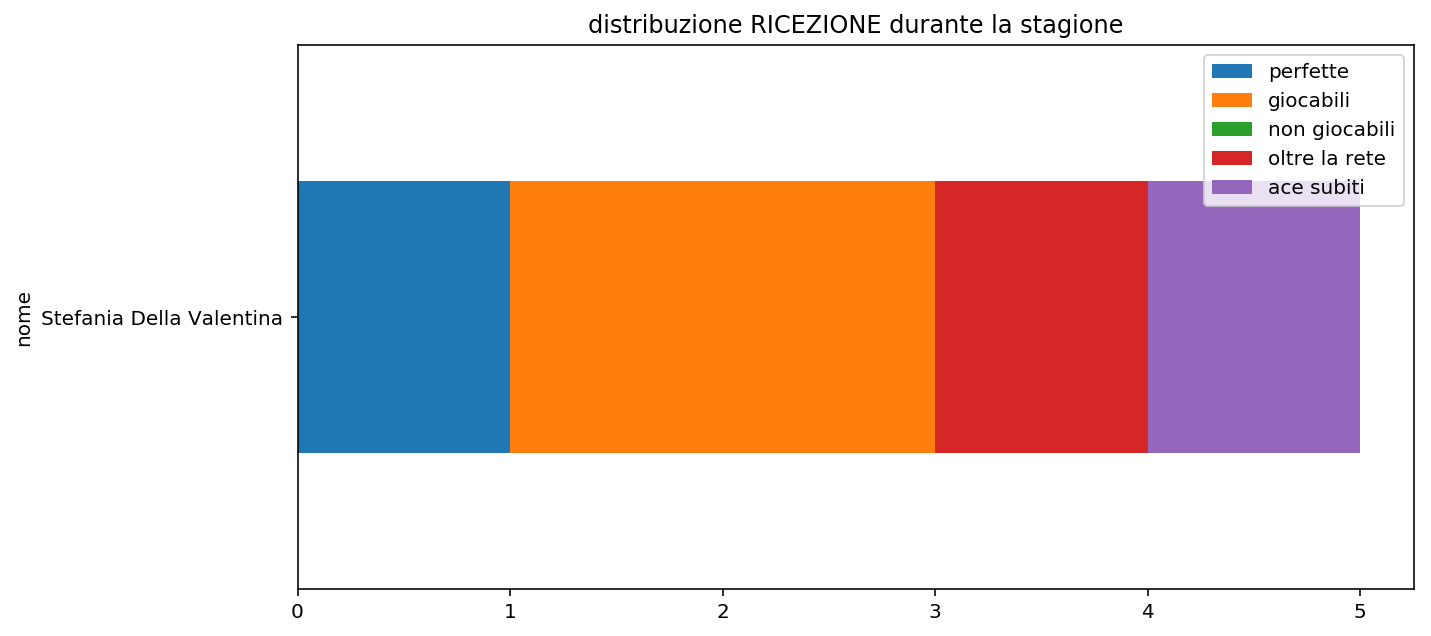

In [88]:
ricezione=datigiocatore['ricezione']
grafico_distro_ricezione = ricezione[["perfette","giocabili","non giocabili","oltre la rete","ace subiti"]].plot.barh(stacked=True,figsize=[10,5],title="distribuzione RICEZIONE durante la stagione")

#### MURO

In [90]:
muri = datigiocatore['muro']